In [1]:
import pandas as pd
import numpy as np
import os
from collections import namedtuple
from scipy import stats

In [2]:
args = {
    'score_path' : './binding_scores/',
}
args = namedtuple('args', args.keys())(*args.values())

In [54]:
columns = ['Target', 'KendalR', 'SpearmanR', 'PearsonR']
stats_data = []
for filename in os.listdir(args.score_path):
    data = pd.read_csv(args.score_path + filename).dropna()
    if len(data) == 0:
        continue
    x = data['Binding-Score']
    y = data['InterfE']
    kendalr, _ = stats.kendalltau(x, y)
    spearmanr, _ = stats.spearmanr(x, y)
    pearsonr, _ = stats.pearsonr(x, y)
    
    target = data.iloc[0]['Target-Name']
    stats_data.append([target, kendalr, spearmanr, pearsonr])

stats_data = pd.DataFrame(data=stats_data, columns=columns)
stats_data = stats_data.sort_values(by=['KendalR'])
stats_data.to_csv('corr_summary.csv', index=False)

In [64]:
overlapping = []
for filename in os.listdir(args.score_path):
    data = pd.read_csv(args.score_path + filename)
    data = data.dropna()
    if len(data) == 0:
        continue
    data = data.sort_values(by=['Binding-Score'], ascending=False)
    s1 = set(data[:10]['Ligand-Name'].tolist())
    s2 = s1 & set(data[['Ligand-Name', 'InterfE']].sort_values(by=['InterfE'])['Ligand-Name'][:10])
    target = ".".join(filename.split('-')[-1].split('.')[:-1])
    overlapping.append([target, len(s2) / len(s1)])

overlapping = pd.DataFrame(data=overlapping, columns=['Target', '%overlapping'])
overlapping.sort_values(by=['%overlapping'], inplace=True, ascending=False)
overlapping.to_csv('overlapping.csv', index=False)

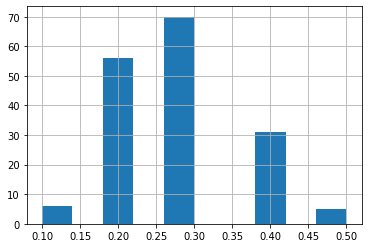

In [65]:
overlapping['%overlapping'].hist()

In [66]:
stats_data.sort_values(by=['KendalR'])[:10].style.background_gradient()

,Target,KendalR,SpearmanR,PearsonR
73,E9AQ39.0.apo,-0.347494,-0.470896,-0.320005
113,A0A3Q8IA63.0.apo,-0.313747,-0.432939,-0.272038
5,A0A088RZ69.0.apo,-0.281732,-0.396628,-0.227911
16,A0A088RNG1.0.apo,-0.275588,-0.389701,-0.248752
36,A0A3P3Z1R7.0.apo,-0.271784,-0.378095,-0.235808
98,A0A5K1VH91.0.apo,-0.270507,-0.367279,-0.241054
60,A0A3P3ZDV2.0.apo,-0.259283,-0.340000,-0.232994
141,A0A1E1J2F8.0.apo,-0.251856,-0.365823,-0.259748
123,A0A3G4YQ95.0.apo,-0.250466,-0.340141,-0.220626
97,E9AWJ0.0.apo,-0.232407,-0.336111,-0.133163


In [67]:
overlapping.describe()

,%overlapping
count,168.000000
mean,0.283929
std,0.087089
min,0.100000
25%,0.200000
50%,0.300000
75%,0.300000
max,0.500000
